In [1]:
import os
import pandas as pd
import numpy as np
import datetime

pd.set_option('display.max_columns', 100)

In [2]:
os.chdir('..')

In [3]:
pwd

'/Users/A.IVA/Documents/jupyter_notebooks/coursera_and_blogs/rossmann_competition'

##### Load data

In [4]:
data_dir = os.path.join('..', 'data', 'rossmann-store-sales', 'source')
dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d')


df_store = pd.read_csv( os.path.join(data_dir, 'store.csv'))
df_train = pd.read_csv( os.path.join(data_dir, 'train.csv'), parse_dates=[2], low_memory=False)
df_test = pd.read_csv( os.path.join(data_dir, 'test.csv'), parse_dates=[3], date_parser=dateparse)

In [5]:
print(df_store.shape, df_train.shape, df_test.shape)
display(df_store.head(2))
display(df_train.head(2))
display(df_test.head(2))

(1115, 10) (1017209, 9) (41088, 8)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


##### Explore data

###### Look at nans

In [6]:
# Check columns for `nan` values
display(df_store.isnull().sum(axis = 0))
display(df_train.isnull().sum(axis = 0))
display(df_test.isnull().sum(axis = 0))

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

###### `df_test[Open]`

In [7]:
# Sunday is missing -> replace NaN with 1
df_test[df_test['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [9]:
df_test['Open'].value_counts()

1.0    35093
0.0     5984
Name: Open, dtype: int64

In [10]:
df_test[df_test['Open'] == 0]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
543,544,703,4,2015-09-17,0.0,1,0,0
676,677,879,4,2015-09-17,0.0,1,0,0
840,841,1097,4,2015-09-17,0.0,1,0,0
1399,1400,703,3,2015-09-16,0.0,1,0,0
1532,1533,879,3,2015-09-16,0.0,1,0,0
...,...,...,...,...,...,...,...,...
40227,40228,1111,7,2015-08-02,0.0,0,0,0
40228,40229,1112,7,2015-08-02,0.0,0,0,0
40229,40230,1113,7,2015-08-02,0.0,0,0,0
40230,40231,1114,7,2015-08-02,0.0,0,0,0


In [8]:
df_test['DayOfWeek'].value_counts()

7    5992
6    5992
4    5992
3    5992
2    5992
1    5992
5    5136
Name: DayOfWeek, dtype: int64

In [ ]:
df_test['Open'].fillna(1)

###### `df_store[CompetitionOpenSinceMonth]`

In [20]:
print(df_store[df_store['CompetitionOpenSinceMonth'].isnull()].shape)
print(df_store[df_store['CompetitionOpenSinceYear'].isnull()].shape)
print(df_store[(df_store['CompetitionOpenSinceYear'].isnull()) & (df_store['CompetitionOpenSinceYear'].isnull())].shape)

(354, 10)
(354, 10)
(354, 10)


In [22]:
bad_stores = df_store[df_store['CompetitionOpenSinceMonth'].isnull()]['Store'].values

In [24]:
bad_stores[0]

12

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [36]:
r, c = math.ceil(len(stores)/5.), 5
r, c

(2, 5)

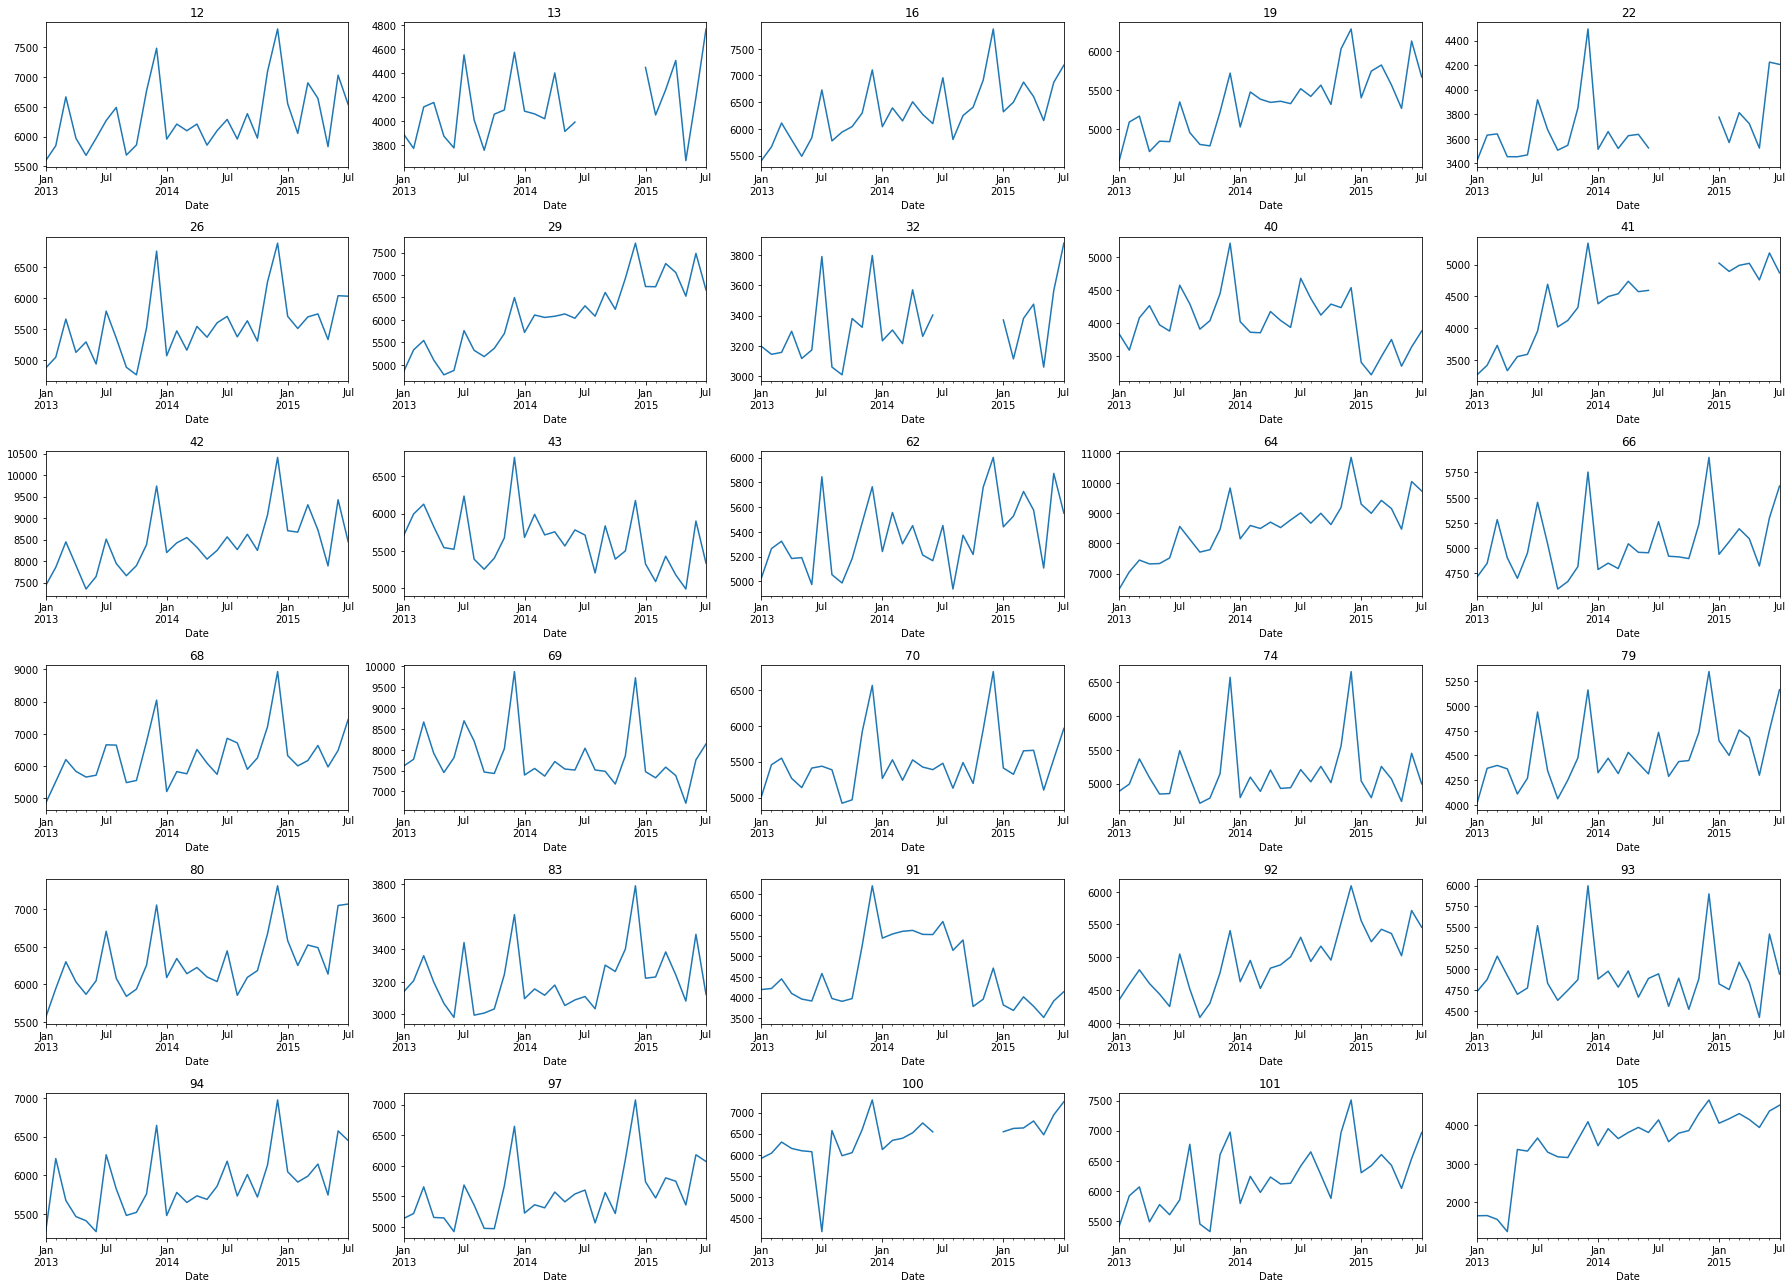

In [50]:
stores = bad_stores[:30]

r, c = math.ceil(len(stores)/5.), 5

plt.figure(figsize=(25, r * 3))

for idx, store in enumerate(stores, 1):
    
    plt.subplot(r, c, idx)
    df_train[df_train['Store']==store].set_index(['Date'])[['Sales']].sort_index().resample('M').mean()['Sales'].plot()
    plt.title(store)
    plt.tight_layout()
    
plt.show()

In [63]:
# Just asume that the competition has not opened

In [ ]:
df_store['CompetitionOpenSinceMonth'].fillna(1)
df_store['CompetitionOpenSinceYear'].fillna(2020)

###### `df_store[Promo2SinceWeek]`

In [ ]:
# There is just no promotion
# Promo2SinceWeek, Promo2SinceYear

###### Weekly average

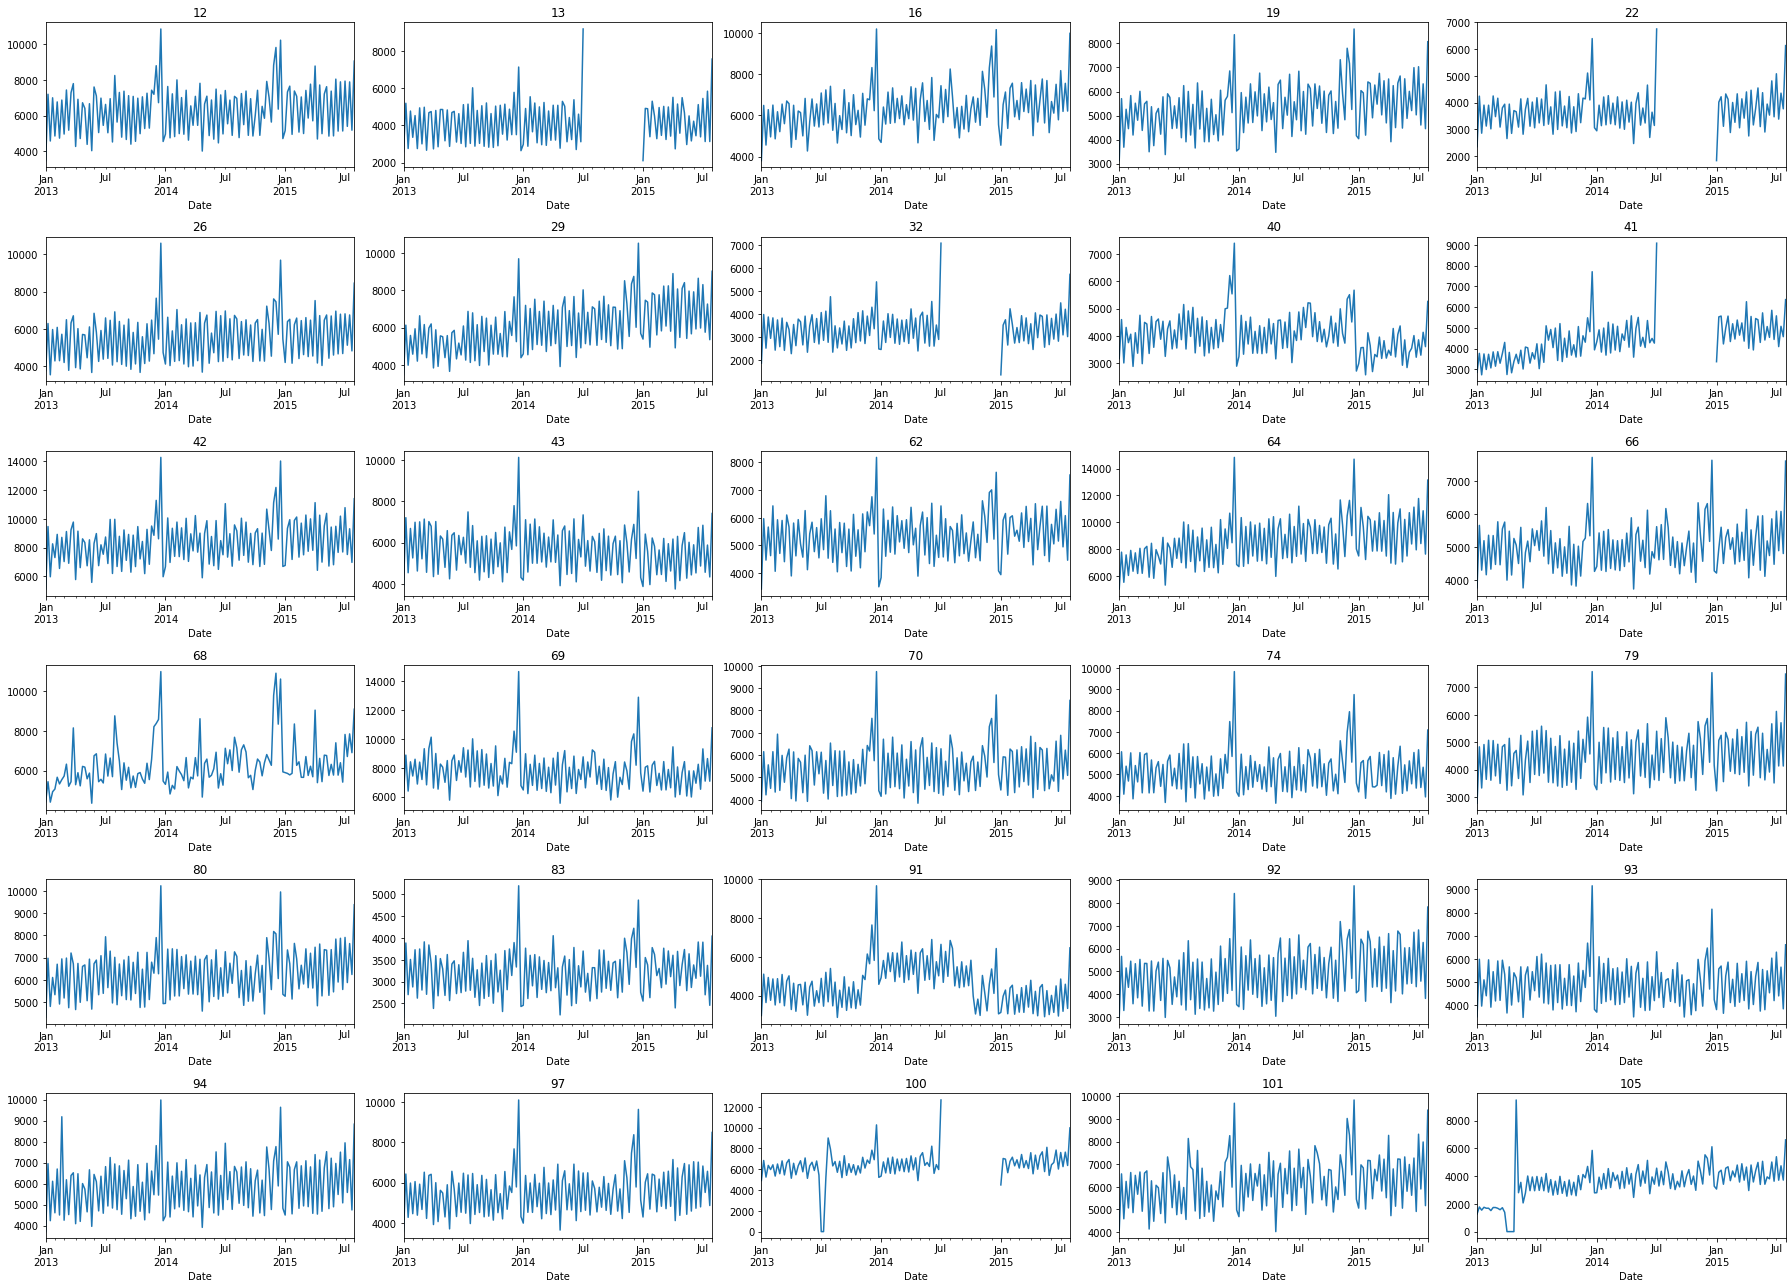

In [66]:
stores = bad_stores[:30]

r, c = math.ceil(len(stores)/5.), 5

plt.figure(figsize=(25, r * 3))

for idx, store in enumerate(stores, 1):
    
    plt.subplot(r, c, idx)
    df_train[df_train['Store']==store].set_index(['Date'])[['Sales']].sort_index().resample('W').mean()['Sales'].plot()
    plt.title(store)
    plt.tight_layout()
    
plt.show()

###### Last weeks of the year

In [68]:
tmp = df_train[df_train['Store']==12].set_index(['Date'])[['Sales']].sort_index().resample('W').mean()['Sales']

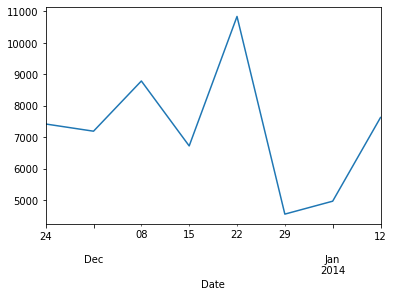

In [76]:
# tmp.loc[tmp.index.map(lambda x: x.week > 42 or x.week<4)].plot()
tmp.loc[tmp.index.map(lambda x: x > datetime.date(2013,11,20) and x < datetime.date(2014,1,14))].plot()

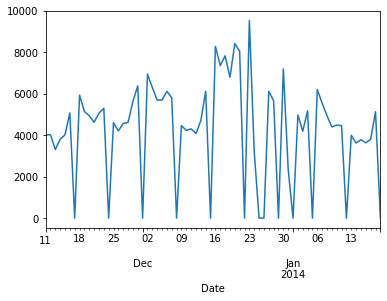

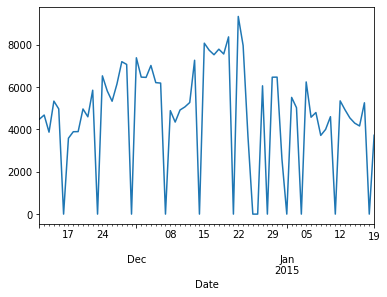

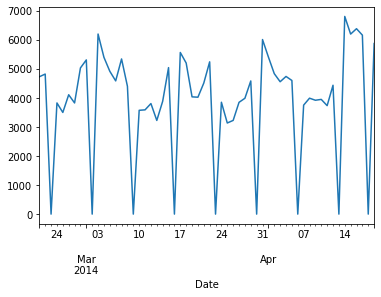

In [89]:
store = 1
tmp = df_train[df_train['Store']==store].set_index(['Date'])[['Sales']].sort_index().resample('D').mean()['Sales']
tmp.loc[tmp.index.map(lambda x: x > datetime.date(2013,11,10) and x < datetime.date(2014,1,20))].plot()
plt.show()

tmp = df_train[df_train['Store']==store].set_index(['Date'])[['Sales']].sort_index().resample('D').mean()['Sales']
tmp.loc[tmp.index.map(lambda x: x > datetime.date(2014,11,10) and x < datetime.date(2015,1,20))].plot()
plt.show()

tmp = df_train[df_train['Store']==store].set_index(['Date'])[['Sales']].sort_index().resample('D').mean()['Sales']
tmp.loc[tmp.index.map(lambda x: x > datetime.date(2014,2,20) and x < datetime.date(2014,4,20))].plot()
plt.show()

###### Generate new features

### 2 Train TS 

In [165]:
data_dir = os.path.join('..', 'data', 'rossmann-store-sales', 'source')
dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d')


df_store = pd.read_csv( os.path.join(data_dir, 'store.csv'))
df_train = pd.read_csv( os.path.join(data_dir, 'train.csv'), parse_dates=[2], date_parser=dateparse, low_memory=False)
df_test = pd.read_csv( os.path.join(data_dir, 'test.csv'), parse_dates=[3], date_parser=dateparse)

# fill nans
df_test['Open'] = df_test['Open'].fillna(1)
df_store['CompetitionOpenSinceMonth'] = df_store['CompetitionOpenSinceMonth'].fillna(1)
df_store['CompetitionOpenSinceYear'] = df_store['CompetitionOpenSinceYear'].fillna(2020)


# new feature?
df_store['competition'] = df_store[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']]\
    .apply(lambda x: datetime.date(int(x[0]), int(x[1]), 1) if x[0] > 0 and x[1] > 0 else pd.NaT, 1)

df_store['competition'] = pd.to_datetime(df_store['competition'], format='%Y-%m-%d')
df_store = df_store.drop(columns=['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth'])


In [166]:
months_to_num = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sept': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

def get_promo_months(x):
    """
    :param x: string of comma separated name of months, e.g. 'Jul,Aug,Sep,Nov'
    :return: list of integers
    """
    if type(x) != str:
        return []
    else:
        months = x.split(',')
        months = map(lambda x: months_to_num[x], months)
        return list(months)

def get_promo_date(yr, week):
    """
    :param yr: year
    :param week: week
    :return: date
    """
    try:
        date = datetime.datetime(int(yr), 1, 1) + datetime.timedelta(days = 7 * (int(week)-1))
        date = datetime.date(date.year, date.month, 1)
        return date
    except (TypeError, ValueError):
        return None  # pd.NaT
    
def get_all_promo(since, intervals):
    if since is not None:
        promos = [datetime.date(yr, m, 1) 
                  for yr in [2013, 2014, 2015] 
                  for m in intervals 
                  if datetime.date(yr, m, 1) >= since]
        return promos
    else:
        return None

In [167]:
# Promo2SinceWeek_
df_store['Promo2Since'] = df_store[['Promo2SinceYear', 'Promo2SinceWeek']].apply(lambda x: get_promo_date(x[0], x[1]), 1)
df_store['PromoInterval'] = df_store['PromoInterval'].apply(lambda x: get_promo_months(x))

df_store['promos2'] = df_store[['Promo2Since', 'PromoInterval']].apply(lambda x: get_all_promo(x[0],x[1]), 1)

df_store = df_store.drop(['PromoInterval', 'Promo2Since', 'Promo2SinceYear', 'Promo2SinceWeek'], 1)

In [168]:
df_store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,Promo2,competition,promos2
0,1,c,a,1270.0,0,2008-09-01,None
1,2,a,a,570.0,1,2007-11-01,"[2013-01-01, 2013-04-01, 2013-07-01, 2013-10-0..."


In [169]:
df = pd.concat([df_train, df_test], sort=False).reset_index(drop=True)\
    .sort_values(by=['Store', 'Date'])

df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
1016095,1,2,2013-01-01,0.0,0.0,0.0,0,a,1,NaN
1014980,1,3,2013-01-02,5530.0,668.0,1.0,0,0,1,NaN


In [170]:
df = df.set_index(['Store']) \
    .join(df_store.set_index(['Store'])) \
    .reset_index() \
    .sort_values(by=['Store', 'Date']) \
    .reset_index(drop='True')

In [171]:
df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,StoreType,Assortment,CompetitionDistance,Promo2,competition,promos2
0,1,2,2013-01-01,0.0,0.0,0.0,0,a,1,NaN,c,a,1270.0,0,2008-09-01,None
1,1,3,2013-01-02,5530.0,668.0,1.0,0,0,1,NaN,c,a,1270.0,0,2008-09-01,None


In [159]:
df.dtypes

Store                           int64
DayOfWeek                       int64
Date                   datetime64[ns]
Sales                         float64
Customers                     float64
Open                          float64
Promo                           int64
StateHoliday                   object
SchoolHoliday                   int64
StoreType                      object
Assortment                     object
CompetitionDistance           float64
Promo2                          int64
competition            datetime64[ns]
promos                         object
dtype: object

### 3 Some simple models

In [4]:
from rossmann.preprocess import load_and_preprocess
from rossmann.feature_generator import promo2_running

In [5]:
data_dir = os.path.join('..', 'data', 'rossmann-store-sales', 'source')
df = load_and_preprocess(data_dir)

df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,StoreType,Assortment,CompetitionDistance,competition_since,promos2
0,1,2,2013-01-01,0.0,0.0,0.0,0,a,1,NaN,c,a,1270.0,2008-09-01,None
1,1,3,2013-01-02,5530.0,668.0,1.0,0,0,1,NaN,c,a,1270.0,2008-09-01,None


In [6]:
# Is promo2 running?
df['Promo2'] = df[['Date', 'promos2']].apply(lambda x: promo2_running(x[0], x[1]), 1)

# Has the last competitor already arrived?
df['last_competitor_here'] = (df['competition_since'] <= df['Date']).astype(int)

# NEW feature (in case I decide to drop the Date column)
df['days_since_start'] = df['Date'].apply(lambda x: (x - datetime.datetime(2013,1,1)).days)

# dummyrize
df = pd.concat([df.drop(['StateHoliday'],1), 
                pd.get_dummies(df['StateHoliday'], prefix='state_h_')], axis=1, sort=False)

df = pd.concat([df.drop(['DayOfWeek'],1), 
                pd.get_dummies(df['DayOfWeek'], prefix='day_')], axis=1, sort=False)

df.head(2)

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,Id,StoreType,Assortment,CompetitionDistance,competition_since,promos2,Promo2,last_competitor_here,days_since_start,state_h__0,state_h__a,state_h__b,state_h__c,day__1,day__2,day__3,day__4,day__5,day__6,day__7
0,1,2013-01-01,0.0,0.0,0.0,0,1,NaN,c,a,1270.0,2008-09-01,None,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1,1,2013-01-02,5530.0,668.0,1.0,0,1,NaN,c,a,1270.0,2008-09-01,None,0,1,1,1,0,0,0,0,0,1,0,0,0,0


In [10]:
# We can immediately predict the 'Sales' if the store is closed.
df['Sales'] = df[['Open', 'Sales']].apply(lambda x: 0 if x[0] == 0 else x[1], 1)

In [8]:
# all_stores = list(df['Store'].drop_duplicates().values)

# df_all = {}
# for store in all_stores:
#     df_all[store] = df[(df['Store'] == store)]\
#         .copy(deep=True) \
#         .sort_values(['Date'])
    
#     df_all[store] = df[(df['Store'] == store) & (df['Open'] == 1)]\

###### Apply a ts model to one of the stores

In [96]:
# df_all[1]

In [28]:
# store = 1
# tt = df_all[store][df_all[store]['Open'] == 1].copy(deep=True).reset_index(drop=True)

# train = tt[(tt['Date'] <= datetime.datetime(2015, 7, 31))]
# test  = tt[(tt['Date'] > datetime.datetime(2015, 7, 31))]

In [14]:
# exogen_vars = ['Promo', 'SchoolHoliday','Promo2', 
#                'last_competitor_here', 'days_since_start', 
#                'state_h__0', 'state_h__a', 'state_h__b', 'state_h__c', 
#                'day__1', 'day__2', 'day__3', 'day__4', 'day__5', 'day__6', 'day__7']

# endogen_vars = ['Sales']

In [25]:
import statsmodels.api as sm
from rossmann.model_selection import get_arima_ic, get_best_model_and_predict_v1

In [64]:
# store = 1
# prediction = get_best_model_and_predict_v1(df_all[store])

/Users/A.IVA/opt/anaconda3/envs/rossmann/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/A.IVA/opt/anaconda3/envs/rossmann/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [26]:
df.loc[(df['Store'] == store) & 
       (df['Open'] == 1) & 
       (df['Date'] > datetime.datetime(2015, 7, 31)), 'Sales'] = get_best_model_and_predict_v1(df[df['Store'] == store])


/Users/A.IVA/opt/anaconda3/envs/rossmann/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/A.IVA/opt/anaconda3/envs/rossmann/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [12]:
store = 1

df_all[store].loc[(df_all[store]['Open'] == 1) & 
                  (df_all[store]['Date'] > datetime.datetime(2015, 7, 31)), 'Sales'] = get_best_model_and_predict_v1(df_all[store])

/Users/A.IVA/opt/anaconda3/envs/rossmann/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/A.IVA/opt/anaconda3/envs/rossmann/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [27]:
result = df[df['Id'].notnull()][['Id', 'Sales']]
result['Id'] = result['Id'].astype(int)
result = result.set_index(['Id'])

In [28]:
result.head(2)

,Sales
Id,
40233,4711.287276
39377,0.000000


In [22]:
pwd

'/Users/A.IVA/Documents/jupyter_notebooks/coursera_and_blogs/rossmann_competition'

In [23]:
result.to_csv('predictions.csv')

In [56]:
tmp = df_all[store][df_all[store]['Open'] == 1].copy(deep=True)

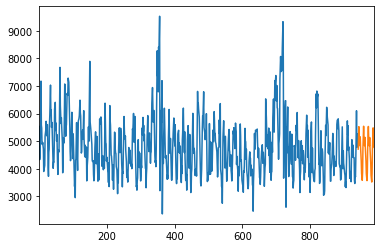

In [59]:
tmp[tmp['Date']<= datetime.datetime(2015, 7, 31)]['Sales'].plot()
tmp[tmp['Date'] > datetime.datetime(2015, 7, 31)]['Sales'].plot()

In [ ]:
# 
# predict everything

for store in stores:
    df_all[store].loc[(df_all[store]['Open'] == 1) & 
                      (df_all[store]['Date'] > datetime.datetime(2015, 7, 31)), 'Sales'] = get_best_model_and_predict_v1(df_all[store])

### 4 All in one

In [12]:
pwd

'/Users/A.IVA/Documents/jupyter_notebooks/coursera_and_blogs/rossmann_competition'

In [13]:
data_dir = os.path.join('..', 'data', 'rossmann-store-sales', 'source')

In [14]:
from rossmann.models.model_01 import model_01

import pandas as pd
import datetime
from typing import List, Dict, Tuple, Union, Any

from rossmann.preprocess import load_and_preprocess
from rossmann.feature_generator import promo2_running
from rossmann.model_selection import get_best_model_and_predict_01

In [15]:
n_stores=2

df = load_and_preprocess(data_dir)

# Generate new features

# Is promo2 running?
df['Promo2'] = df[['Date', 'promos2']].apply(lambda x: promo2_running(x[0], x[1]), 1)

# Has the last competitor already arrived?
df['last_competitor_here'] = (df['competition_since'] <= df['Date']).astype(int)

# I will drop the `Date` column and use this column as my the trend generator
df['days_since_start'] = df['Date'].apply(lambda x: (x - datetime.datetime(2013, 1, 1)).days)

# ohe of some variables
df = pd.concat([df.drop(['StateHoliday'], 1),
                pd.get_dummies(df['StateHoliday'], prefix='state_h_')], axis=1, sort=False)

df = pd.concat([df.drop(['DayOfWeek'], 1),
                pd.get_dummies(df['DayOfWeek'], prefix='day_')], axis=1, sort=False)

# Prediction

# We can immediately predict the 'Sales' if the store is closed.
df['Sales'] = df[['Open', 'Sales']].apply(lambda x: 0 if x[0] == 0 else x[1], 1)

# get the indices of all stores
all_stores = list(df['Store'].drop_duplicates().values)
if n_stores is not None:
    all_stores = all_stores[:n_stores]

In [16]:
all_stores

[1, 2]

In [18]:
from sklearn.metrics import mean_absolute_error
from rossmann.utils import rmspe

##### prediction

In [19]:
store = 1

exogen_vars = ['Promo', 'Promo2', 'SchoolHoliday',
               'last_competitor_here', 'days_since_start',
               'state_h__0', 'state_h__a', 'state_h__b', 'state_h__c',
               'day__1', 'day__2', 'day__3', 'day__4', 'day__5', 'day__6', 'day__7']

prediction, metric_values = get_best_model_and_predict_01(df = df[df['Store'] == store],
                                                          exogen_vars = exogen_vars,
                                                          endogen_var = 'Sales',
                                                          p_range = (0, 2),
                                                          d_range = (0, 1),
                                                          q_range = (0, 2),
                                                          metrics = {'mae': mean_absolute_error,
                                                                     'rmspe': rmspe},
                                                          order_metric = 'rmspe_valid')


/Users/A.IVA/opt/anaconda3/envs/rossmann/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [1]:
# metric_values
# for el in metric_values:
#     print('mae {0} \t pdq {1}'.format(el['mae'], el['pdq']))

##### try to predict more

In [20]:
store = 1

exogen_vars = ['Promo', 'Promo2', 'SchoolHoliday',
               'last_competitor_here', 'days_since_start',
               'state_h__0', 'state_h__a', 'state_h__b', 'state_h__c',
               'day__1', 'day__2', 'day__3', 'day__4', 'day__5', 'day__6', 'day__7']

endogen_var = 'Sales'

In [21]:
pdq = (3,0,0)

In [22]:
t1_, t2_ = datetime.datetime(2014, 1, 1), datetime.datetime(2014, 7, 31)
t1, t2 = datetime.datetime(2015, 1, 1), datetime.datetime(2015, 7, 31)

tt = df[(df['Open'] == 1) & (df['Store'] == store)] \
    .copy(deep=True) \
    .reset_index(drop=True)

train = tt[tt['Date'] < t1]
valid = tt[tt['Date'].between(t1, t2, inclusive=True)]
test = tt[tt['Date'] > t2]

In [23]:
import statsmodels.api as sm

In [24]:
mod = sm.tsa.statespace.SARIMAX(endog=train[endogen_var],
                                exog=train[exogen_vars],
                                order=pdq)
fit_res = mod.fit(disp=False)

# predictions on validation data
prediction_valid = fit_res.forecast(steps=len(valid),
                                    exog=valid[exogen_vars])


# predictions on a subset of training data
indxes = tt[tt['Date'].between(t1_, t2_, inclusive=True)].index.to_list()
prediction_train = fit_res.get_prediction(start=indxes[0], 
                                          end=indxes[-1], 
                                          dynamic=0, 
                                          full_results=False).predicted_mean


# Take the pdq-order with the lowest error on the validation data set,
# fit the model on the train+valid data and predict on the test data.
mod = sm.tsa.statespace.SARIMAX(endog=tt[tt['Date'] <= t2][endogen_var],
                                exog=tt[tt['Date'] <= t2][exogen_vars],
                                order=pdq)
fit_res = mod.fit(disp=False)

prediction = fit_res.forecast(steps=len(test),
                              exog=test[exogen_vars])

In [25]:
from sklearn.metrics import mean_absolute_error

In [27]:
metrics = {'mae': mean_absolute_error, 'rmspe': rmspe}

dict((k, v(valid[endogen_var], prediction_valid)) for k, v in metrics.items())

{'mae': 504.77527590222604, 'rmspe': 0.14333710144648174}

In [28]:
dict((k, v(tt.loc[indxes, endogen_var], prediction_train)) for k, v in metrics.items())

{'mae': 444.9131226420344, 'rmspe': 0.12847621207874044}

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

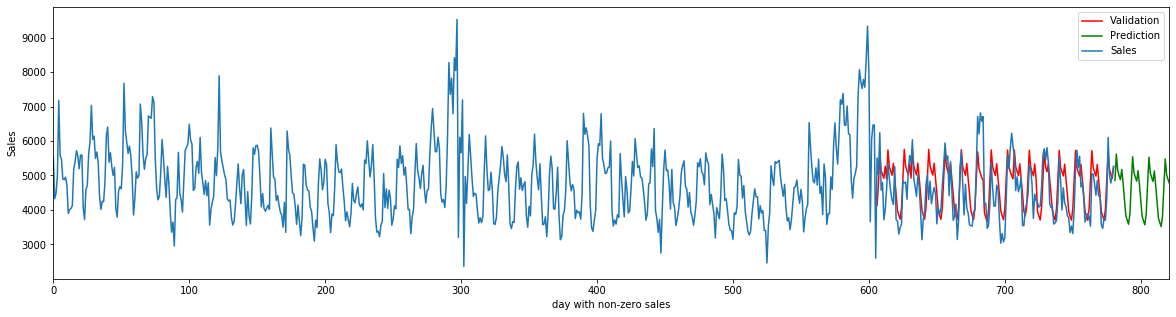

In [34]:
fig = plt.figure(figsize=(20,5))

tmp = df[(df['Store'] == store) & 
         (df['Open']==1) & 
         (df['Date'] <= t2)].reset_index()

prediction_valid.plot(color='red', label='Validation')
# prediction_train.plot(color='orange', label='Train (dymanic=True)')
prediction.plot(color='green', label='Prediction')
# plt.plot(np.arange(len(tmp), len(tmp)+len(prediction_valid)), prediction_valid, color='red')

tmp['Sales'].plot()
plt.legend()
plt.ylabel('Sales')
plt.xlabel('day with non-zero sales')

plt.show()

In [35]:
fig.savefig(f'timeseries.png', transparent=True, pad_inches=0, bbox_inches='tight')

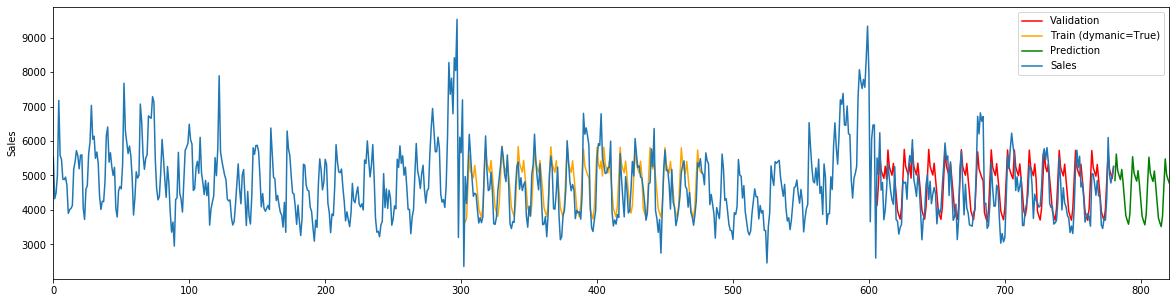

In [78]:
plt.figure(figsize=(20,5))

tmp = df[(df['Store'] == store) & 
         (df['Open']==1) & 
         (df['Date'] <= t2)].reset_index()

prediction_valid.plot(color='red', label='Validation')
prediction_train.plot(color='orange', label='Train (dymanic=True)')
prediction.plot(color='green', label='Prediction')
# plt.plot(np.arange(len(tmp), len(tmp)+len(prediction_valid)), prediction_valid, color='red')

tmp['Sales'].plot()
plt.legend()
plt.ylabel('Sales')

plt.show()

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

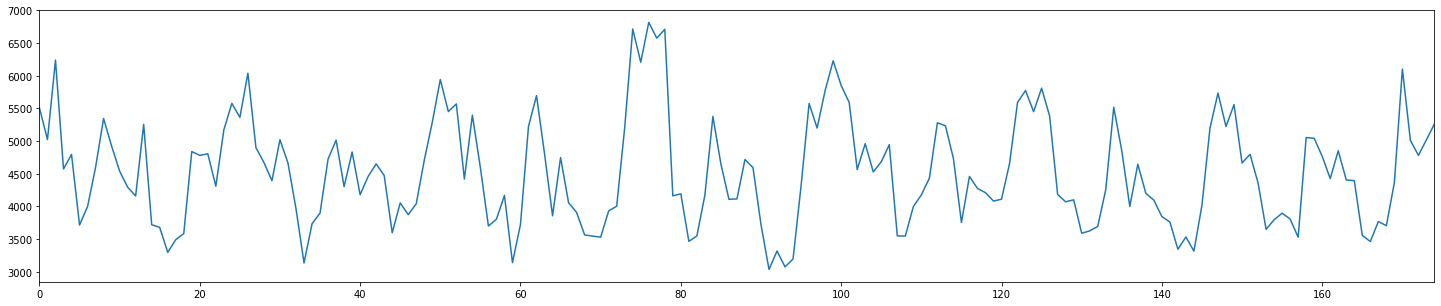

In [40]:
t1, t2 = datetime.datetime(2015, 1, 1), datetime.datetime(2015, 7, 31)

plt.figure(figsize=(25,5))

df[(df['Store'] == store) & 
   (df['Open']==1) & 
   (df['Date'].between(t1, t2))].reset_index()['Sales'].plot()

# plt.plot(np.arange(len(prediction)), prediction)

# for metric_value in metric_values:
    
#     plt.plot(np.arange(len(metric_value['prediction'])), 
#              metric_value['prediction'])

plt.show()

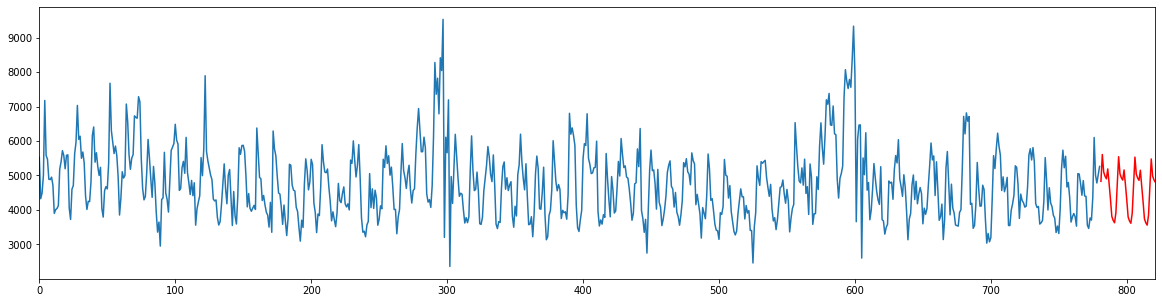

In [40]:
t1, t2 = datetime.datetime(2015, 1, 1), datetime.datetime(2015, 7, 31)

plt.figure(figsize=(20,5))

tmp = df[(df['Store'] == store) & 
         (df['Open']==1) & 
         (df['Date'] <= t2)].reset_index()

plt.plot(np.arange(len(tmp), len(tmp)+len(prediction)), prediction, color='red')

tmp['Sales'].plot()

plt.show()

### 5 All in one again

In [4]:
import os
import json
from rossmann.models.model_01 import model_01
import argparse

In [5]:
output_dir = os.path.join('outputs')
data_dir = os.path.join('..', 'data', 'rossmann-store-sales', 'source')

result, metrics = model_01(data_dir=data_dir,
                           p_range=(0, 2),
                           d_range=(0, 1),
                           q_range=(0, 1),
                           n_stores=4)

####################################################################
# keep relevant information in output directory
####################################################################

os.makedirs(output_dir, exist_ok=True)
result.to_csv(os.path.join(output_dir, 'predictions.csv'))

# with open(os.path.join(output_dir, 'params.json'), 'w') as f:
#     json.dump(dict((k, v) for k, v in args.__dict__.items()), f, indent=2)

with open(os.path.join(output_dir, 'metrics.json'), 'w') as f:
    json.dump(metrics, f, indent=2)

print('Done')


/Users/A.IVA/opt/anaconda3/envs/rossmann/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


store 1 done; 	 rel. time(s): 26.617730140686035
store 2 done; 	 rel. time(s): 26.659803867340088
store 3 done; 	 rel. time(s): 28.259623050689697
store 4 done; 	 rel. time(s): 28.28000807762146


### Look at the predicrtions

In [ ]:
data_dir = os.path.join('..', 'data', 'rossmann-store-sales', 'output_exp', '18')
